In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [13, 7]

### Load co2.csv using Pandas library and set date as the data frame’s index. 

In [24]:
data = pd.read_csv('co2.csv', delimiter=';')

data = data.set_index('date')
data.index = pd.to_datetime(data.index, errors='coerce') 
data = data.iloc[1950*12:]
data['Year'] = data.index.year
data['Month'] = data.index.month
data

,data_mean_global,data_mean_nh,data_mean_sh,Year,Month
date,,,,,
1950-01-15,313.597898,314.751334,312.444461,1950,1
1950-02-15,313.968034,315.402500,312.533568,1950,2
1950-03-15,314.274349,315.997671,312.551026,1950,3
1950-04-15,314.468454,316.441488,312.495420,1950,4
1950-05-15,314.310746,316.134174,312.487318,1950,5
...,...,...,...,...,...
2014-08-15,394.573461,393.376544,395.770379,2014,8
2014-09-15,395.026810,394.318661,395.734959,2014,9
2014-10-15,396.668760,397.456653,395.880867,2014,10


Conclusion: Data was succesfully loaded

### Using line plot, plot all three mean annual CO2 concentrations in one figure as a function of time

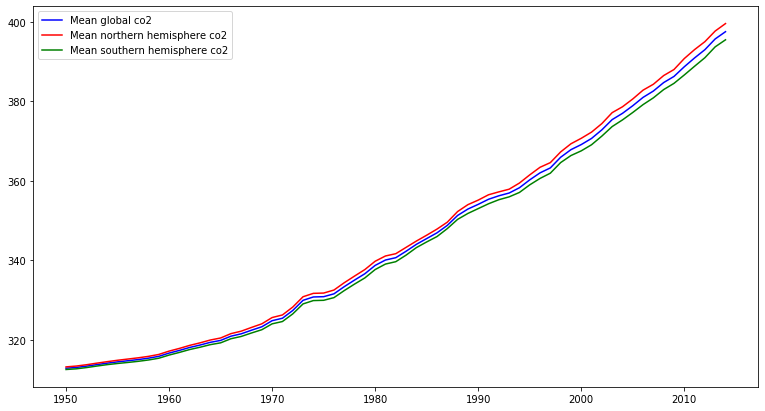

In [25]:
ax = plt.gca()
data_grouped = data.groupby('Year').mean()

plt.plot(data_grouped.index, data_grouped.data_mean_global, color='blue')
plt.plot(data_grouped.index, data_grouped.data_mean_nh, color='red')
plt.plot(data_grouped.index, data_grouped.data_mean_sh, color='green')
plt.legend(['Mean global co2', 'Mean northern hemisphere co2', 'Mean southern hemisphere co2'])

plt.show()

Conlusion: As we can see, mean level of co2 in the atmosphere raise ever more rapidly

### Using Seaborn library, visualise the spread of monthly CO2 concentrations with boxplots. 

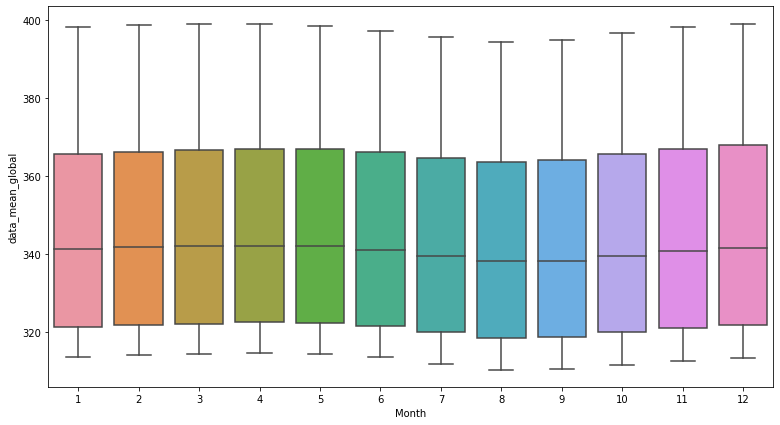

In [26]:
sns.boxplot(x=data.Month, y=data.data_mean_global, data=data)
plt.show()

Conclusion: I am actually surprised to see that northern hemisphere produces more co2 than southern and it can be seen in mean concentration. Months when it's winter in the northern hemisphere have higer global concentration

### Choose one year and compare monthly CO2 concentrations in both hemispheres using bar plot.

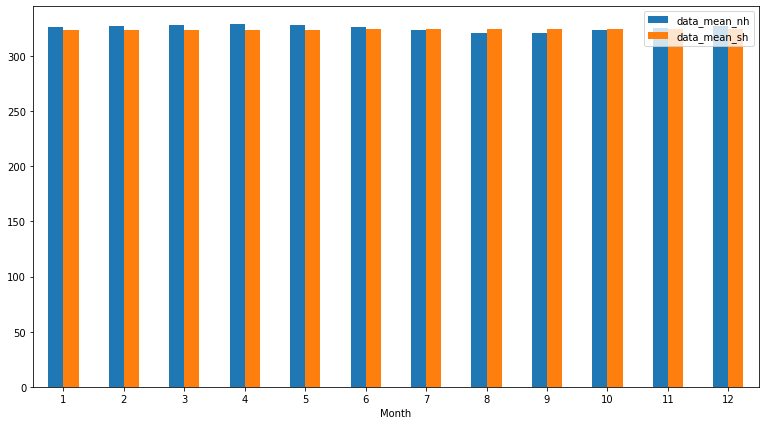

In [27]:
data_one_year = data.loc[data['Year'] == 1970]
data_one_year = data_one_year.drop('data_mean_global', axis=1)
data_one_year = data_one_year.set_index('Month')
data_one_year = data_one_year.drop('Year', axis=1)
data_one_year.plot.bar(rot=0)

Conclusion: As we can see co2 concentration is higher in winter (people turn on heating?)

### Plot monthly CO2 concentrations in both hemispheres. Examine seasonality using autocorrelation function (acf in Statsmodels library) with lags up to 15. Interpret the results

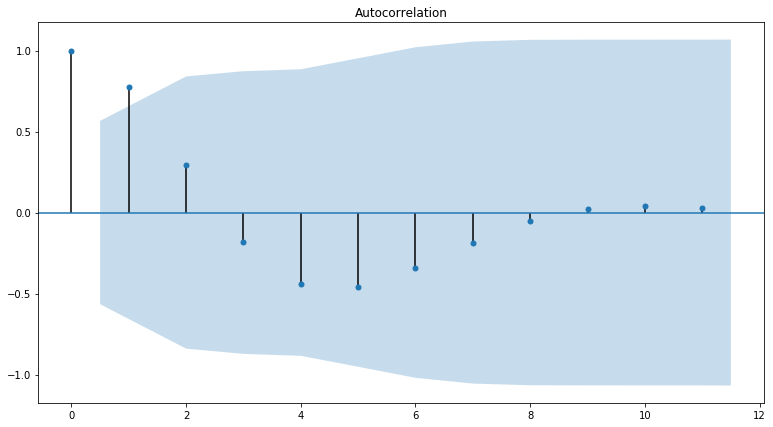

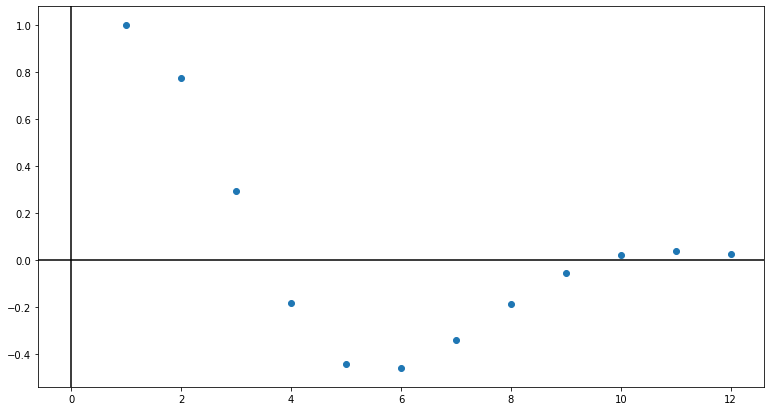

In [45]:
data = pd.read_csv('co2.csv', delimiter=';')
data = data.set_index('date')
data.index = pd.to_datetime(data.index, errors='coerce') 
data = data.iloc[1950*12:]
data['Year'] = data.index.year
data['Month'] = data.index.month

data_for_plot = data[['Month', 'data_mean_nh']]
data_for_plot = data_for_plot.groupby('Month').mean()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_for_plot)
pyplot.show()

from statsmodels.tsa.stattools import acf
acfd_data = acf(data_for_plot)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter([1,2,3,4,5,6,7,8,9,10,11,12], acfd_data)
plt.show()

Conclusion: I cannot say if that's what you asked for, because I'm not really sure I understand what you asked for

### Decompose all series using additive and multiplicative models. Examine trends, seasonal, and residual components.

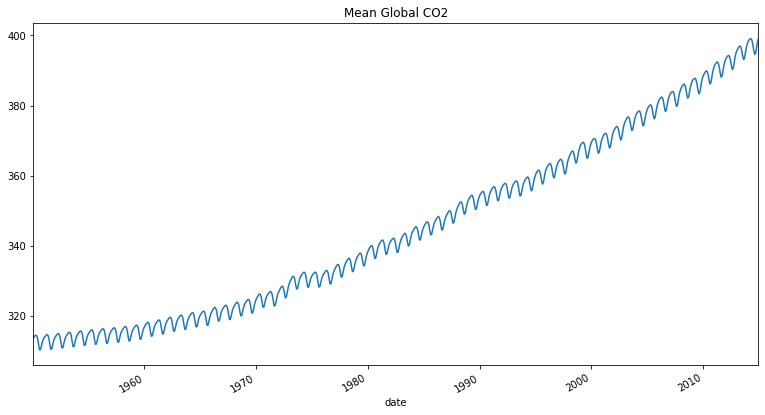

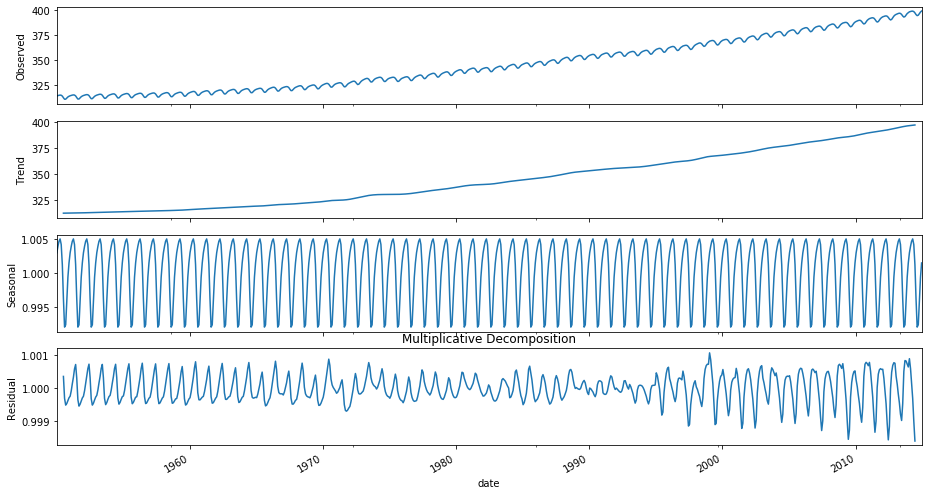

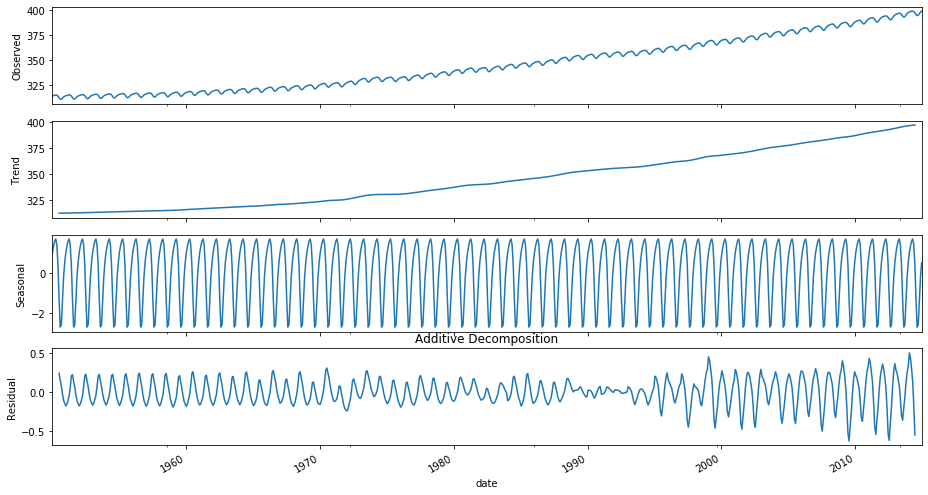

In [5]:
data = pd.read_csv('co2.csv', delimiter=';')
data = data.set_index('date')
data.index = pd.to_datetime(data.index, errors='coerce') 
data = data.iloc[1950*12:]
series = pd.Series(data=data.data_mean_global, index=data.index)
series.plot()
plt.title('Mean Global CO2')
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()
plt.title('Multiplicative Decomposition')
plt.show()

result = seasonal_decompose(series, model='additive', freq=12)
result.plot()
plt.title('Additive Decomposition')
plt.show()

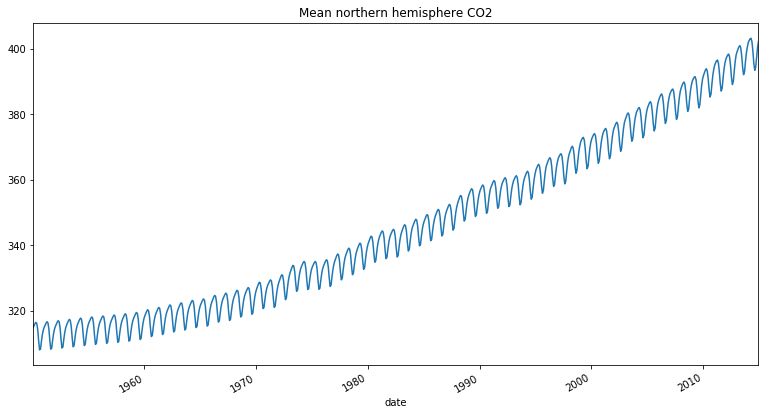

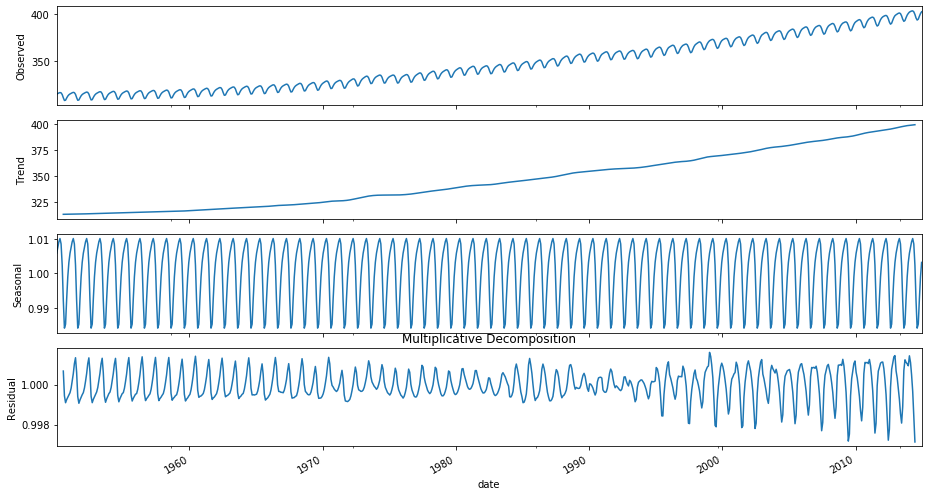

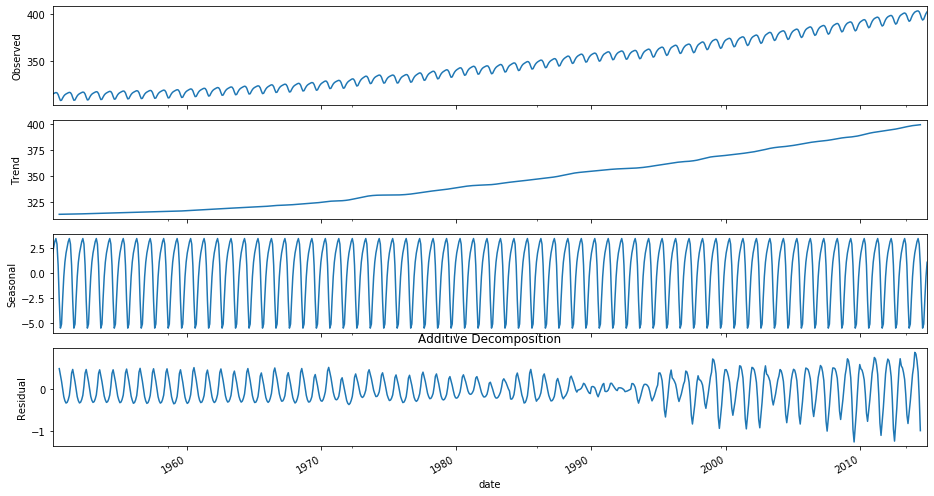

In [6]:
data = pd.read_csv('co2.csv', delimiter=';')
data = data.set_index('date')
data.index = pd.to_datetime(data.index, errors='coerce') 
data = data.iloc[1950*12:]
series = pd.Series(data=data.data_mean_nh, index=data.index)
series.plot()
plt.title('Mean northern hemisphere CO2')
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()
plt.title('Multiplicative Decomposition')
plt.show()

result = seasonal_decompose(series, model='additive', freq=12)
result.plot()
plt.title('Additive Decomposition')
plt.show()

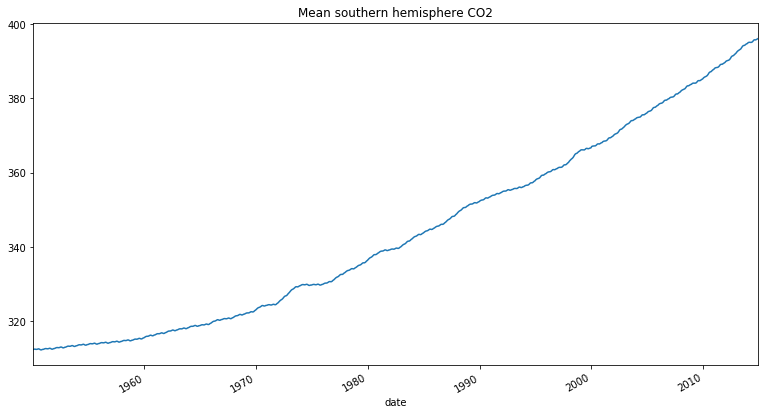

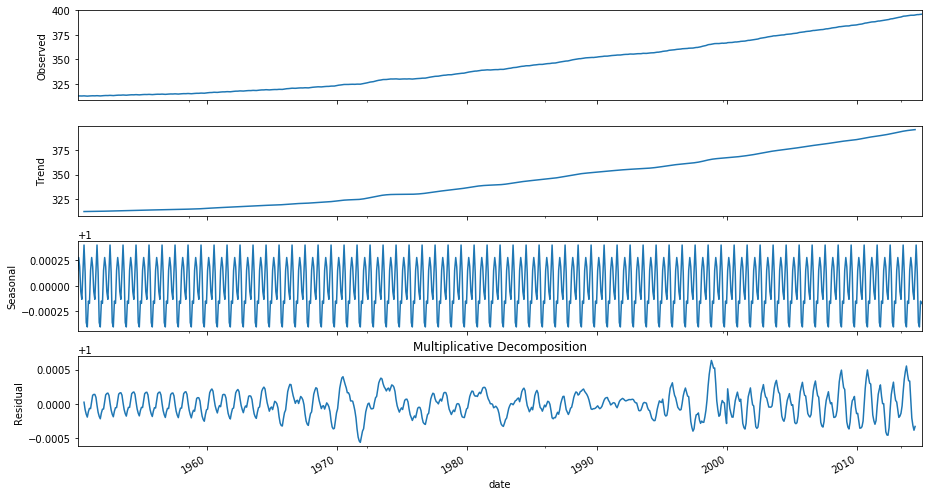

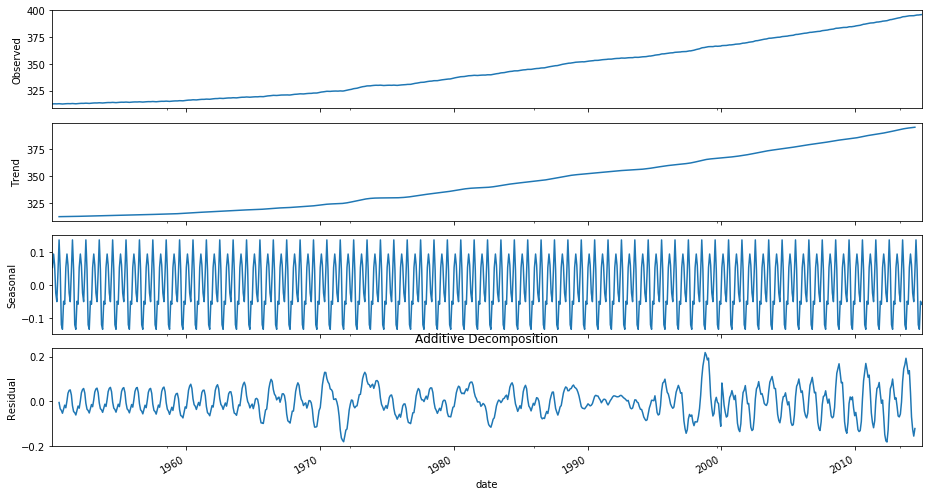

In [7]:
data = pd.read_csv('co2.csv', delimiter=';')
data = data.set_index('date')
data.index = pd.to_datetime(data.index, errors='coerce') 
data = data.iloc[1950*12:]
series = pd.Series(data=data.data_mean_sh, index=data.index)
series.plot()
plt.title('Mean southern hemisphere CO2')
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()
plt.title('Multiplicative Decomposition')
plt.show()

result = seasonal_decompose(series, model='additive', freq=12)
result.plot()
plt.title('Additive Decomposition')
plt.show()

Counclusion: Both decompositions show increase in concentration. In southern hemisphere no seasonality is to be observed